<center> <h2> Random Forest </h2> </center>

<center><img src="pics/RF.png" width=600></center>

<h3> <font color="blue"> Pros </h3>

1. Decision Trees gets to "overfitting" if not pruned properly. Random Forest eliminates it.The votes (classification) and estimates (regression) are "counted" or "averaged" across many trees. Decorrelation happens since the "features" are selected at "random" from the subset of feature space.
2. Since this is "wisdom of crowd" or "ensemble" method, it is less likely to prone to small changes in the datasets.
3. Works well with **high-dimesnion** data.
4. Paralleization : Splitting the process across many machine is easy and hence the computation speed can be made fast.
4. Similar to Decision Tree , Random Forests can handle outliers and non linear data very well.
5. Unbalanced data can be handled well, though this is easily possible in all other "tree" like approaches.

<h3> <font color = "red"> Cons </h3>

1. Since we are building many trees and hence the process may take time and can be expensive in terms of memory consumption.
2. Random Forest can still **overfit** so be careful with the **hyper-parameter**.

<h3> <font color = "green"> How it works </h3>

<p> It is a simple model if you understand how Decision Trees work. The Random Forest is a collection of many trees,
    where features AND data points are selected randomly to create "de-correlated" trees. </p>
<p> Bootstrapping (random sampling with replacement) is done for each data point. </p>

<h3> <span style="background:yellow"> Hyper-parameters </h3>

1. **Maximum Depth** : Careful with overfitting.
2. **Number of Trees** : Generally higher the number the better. Computationally expensise though.
3. **Max Features** : Size of random feature when looking for best split at each node. 
4. **Split Criterion** : Gini or Entropy. Normally either gives good result. Problem specific.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
credit = pd.read_csv('/Users/bt/Documents/GITHUB/creditcard.csv')

In [3]:
credit.drop('Time', axis=1, inplace=True)

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [5]:
X = credit.drop('Class', axis=1)
y = credit[['Class']]

X_train, X_valid, y_train, y_valid = train_test_split(X,y,stratify=y,test_size=0.3, shuffle=True)

In [6]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)

X_valid = sc.transform(X_valid)

In [7]:
model = RandomForestClassifier(n_estimators=100,max_features='sqrt')

In [8]:
model.fit(X_train,y_train.values.ravel())

RandomForestClassifier(max_features='sqrt')

In [9]:
predictions = model.predict(X_valid)

In [10]:
print(pd.DataFrame(confusion_matrix(y_valid,predictions), columns=['Pred:Yes','Pred:No'], index=['Actual:Yes','Actual:No']))

            Pred:Yes  Pred:No
Actual:Yes     85288        7
Actual:No         30      118


In [11]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score

In [12]:
print('Accuracy Score : ' + str(accuracy_score(y_valid,predictions)))
print('Recall Score : ' + str(recall_score(y_valid,predictions)))
print('Precision Score : ' + str(precision_score(y_valid,predictions)))
print('F1 Score : ' + str((f1_score(y_valid,predictions)))) 

Accuracy Score : 0.9995669627705019
Recall Score : 0.7972972972972973
Precision Score : 0.944
F1 Score : 0.8644688644688644


In [13]:
from sklearn.model_selection import cross_validate

In [13]:
model = RandomForestClassifier()

In [15]:
predcited = cross_validate(model,X_train,y_train.values.ravel(),cv=5,scoring='recall')

In [16]:
print(np.mean(predcited['test_score']))

0.790537084398977


In [14]:
from sklearn.model_selection import RandomizedSearchCV

In [15]:
rf = RandomForestClassifier()

In [16]:
from pprint import pprint

In [17]:
pprint(rf.get_params())

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [37]:
n_estimators = [int(x) for x in np.linspace(start=400,stop=600,num=2)]
max_depth = [int(x) for x in np.linspace(10,20,num=2)]
min_samples_split = [10,20]

In [38]:
random_grid = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split}

In [40]:
pprint(random_grid)

{'max_depth': [10, 20],
 'min_samples_split': [10, 20],
 'n_estimators': [400, 600]}


In [41]:
rf_random_grid = RandomizedSearchCV(rf, param_distributions=random_grid, cv=5, n_jobs=-1)

In [42]:
rf_random_grid.fit(X_train,y_train.values.ravel())

/Users/bt/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:278: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [10, 20],
                                        'min_samples_split': [10, 20],
                                        'n_estimators': [400, 600]})

In [43]:
rf_random_grid.best_params_

{'n_estimators': 600, 'min_samples_split': 10, 'max_depth': 20}

In [44]:
rf_random_grid.best_score_

0.9994984051792208

In [45]:
new_model = RandomForestClassifier(**rf_random_grid.best_params_)

In [46]:
new_model.fit(X_train,y_train.values.ravel())

RandomForestClassifier(max_depth=20, min_samples_split=10, n_estimators=600)

In [47]:
predictions = new_model.predict(X_valid)

In [51]:
# Let's find out the various metrics

from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score

print("The accuracy score is : " + str(accuracy_score(y_valid,predictions)))
print("The recall score is : " + str(recall_score(y_valid,predictions)))
print("The precision score is :" + str(precision_score(y_valid,predictions)))
print("The F1 Score is : " + str(f1_score(y_valid,predictions)))

The accuracy score is : 0.9995435553526912
The recall score is : 0.7905405405405406
The precision score is :0.936
The F1 Score is : 0.8571428571428571


In [54]:
# Let's see the classification report

from sklearn.metrics import classification_report

print(classification_report(y_valid,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.94      0.79      0.86       148

    accuracy                           1.00     85443
   macro avg       0.97      0.90      0.93     85443
weighted avg       1.00      1.00      1.00     85443



In [60]:
# Let's see the confusion matrix to make things clear

print(pd.DataFrame(confusion_matrix(y_valid,predictions),columns=['Predicted: 0','Predicted : 1'],\
                   index=['Actual : 0', 'Actual : 1']))

            Predicted: 0  Predicted : 1
Actual : 0         85287              8
Actual : 1            31            117


In [62]:
tn, fp, fn, tp = confusion_matrix(y_valid,predictions).ravel()

In [64]:
print(tn ," : Were actually 0 and were predicted 0")
print(tp , ": Were actually 1 and were predicted 1")
print(fp, ": Were actually 0 but were predicted 1")
print(fn, ": Were actually 1 but were predicted 0")

85287  : Were actually 0 and were predicted 0
117 : Were actually 1 and were predicted 1
8 : Were actually 0 but were predicted 1
31 : Were actually 1 but were predicted 0


<h2> <center> <font color = "blue">ROC Curve </center> </h2>

In [68]:
# import roc_auc_score and roc_curve

from sklearn.metrics import roc_auc_score, roc_curve

In [87]:
# probability estimates

rf_prob_estimates = new_model.predict_proba(X_valid)[:,1]

In [67]:
noskill_prob = [0 for _ in range(len(y_valid))]

In [69]:
noskill_auc = roc_auc_score(y_valid,noskill_prob)

In [73]:
rf_auc = roc_auc_score(y_valid,rf_prob_estimates)

In [75]:
ns_fpr, ns_tpr, _ = roc_curve(y_valid,noskill_prob)

In [77]:
rf_fpr, rf_tpr, _ = roc_curve(y_valid,rf_prob_estimates)

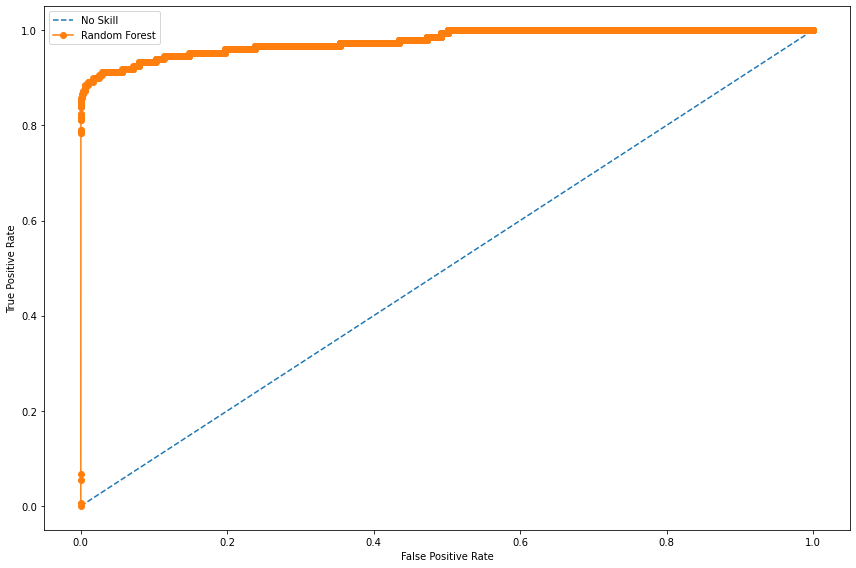

In [85]:
from matplotlib import pyplot

pyplot.figure(figsize=(12,8))
pyplot.plot(ns_fpr,ns_tpr,linestyle="--", label="No Skill")
pyplot.plot(rf_fpr,rf_tpr,marker="o", label="Random Forest")
pyplot.xlabel("False Positive Rate")
pyplot.ylabel("True Positive Rate")
pyplot.legend()
pyplot.tight_layout()
pyplot.show()

In [86]:
# Though RF performs well on accuracy , we are more interested to see how it performed on 
# Recall

<h2> <center> <font color = "blue"> Precision Recall Curve </center> </h2>

In [88]:
from sklearn.metrics import precision_recall_curve, f1_score

In [91]:
ns_precision, ns_recall, _ = precision_recall_curve(y_valid,noskill_prob)

In [92]:
rf_precision, rf_recall, _ = precision_recall_curve(y_valid,rf_prob_estimates)

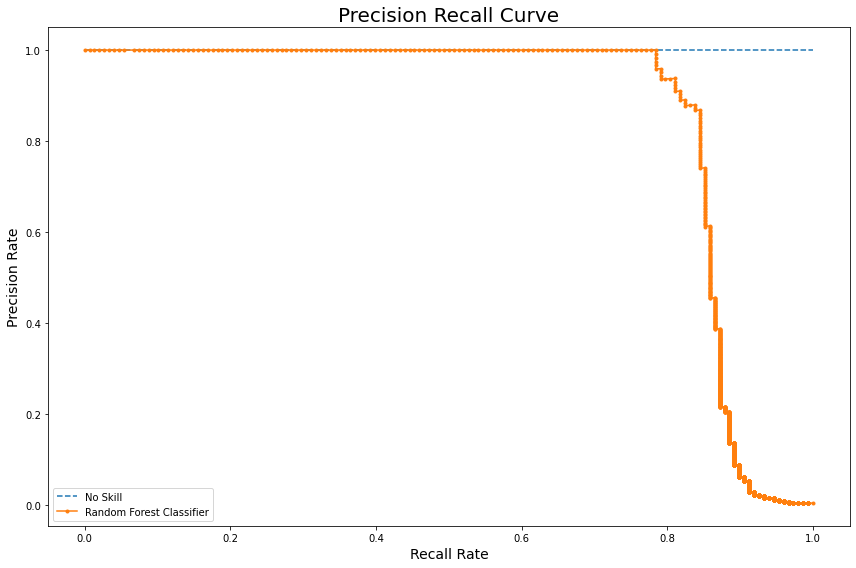

In [104]:
no_skill = len(y_valid[y_valid==1]) / len(y_valid)
pyplot.figure(figsize=(12,8))
pyplot.plot([0,1],[no_skill,no_skill], linestyle="--", label='No Skill')
pyplot.plot(rf_recall,rf_precision,marker='.', label='Random Forest Classifier')
pyplot.xlabel('Recall Rate', size=14)
pyplot.ylabel('Precision Rate', size=14)
pyplot.title('Precision Recall Curve', size=20)
pyplot.legend()
pyplot.tight_layout()
pyplot.show()

In [105]:
# High Recall and Low Precision : Most of the predicted labels are incorrect when compared to training labels
# Low Recall and High Precision : Returns very few results but most of them are correct

In [107]:
from sklearn.metrics import average_precision_score

average_precision = average_precision_score(y_valid,rf_prob_estimates)

In [108]:
average_precision

0.860105363339514

Text(0.5, 1.0, 'Random Forest Precision Recall Curve : AP=0.86')

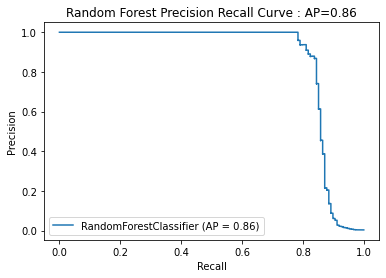

In [115]:
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve
import matplotlib.pyplot as plt

disp = plot_precision_recall_curve(new_model,X_valid,y_valid)
disp.ax_.set_title('Random Forest Precision Recall Curve : '
                  'AP={0:0.2f}'.format(average_precision))

<h2> <center> <font color = 'blue'>Calibration Curve / Reliability Diagrams </center> </h2>

In [117]:
from sklearn.calibration import calibration_curve

In [127]:
prob_true, prob_predicted = calibration_curve(y_valid,rf_prob_estimates,n_bins=20,normalize=True)

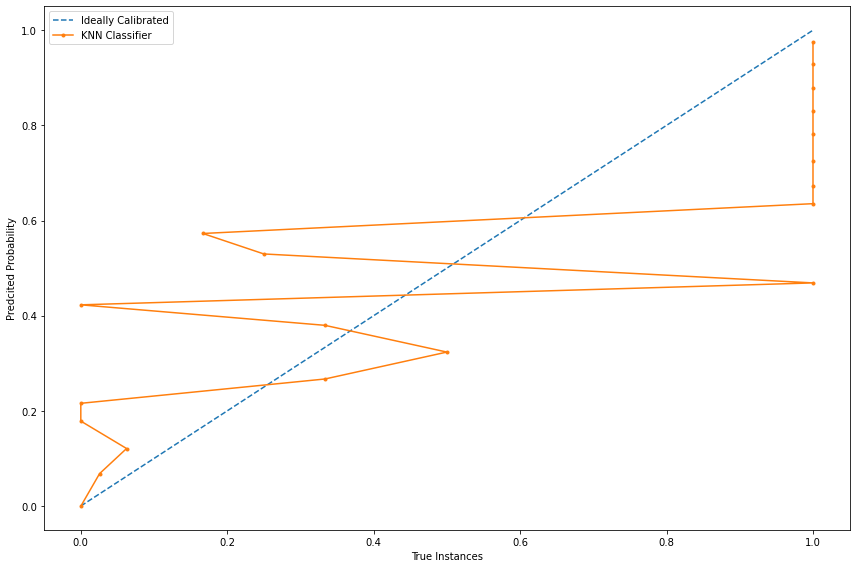

In [128]:
pyplot.figure(figsize=(12,8))
pyplot.plot([0,1],[0,1], linestyle='--', label='Ideally Calibrated')
pyplot.plot(prob_true,prob_predicted, marker='.', label='KNN Classifier')
pyplot.xlabel('True Instances')
pyplot.ylabel('Predcited Probability')
pyplot.tight_layout()
pyplot.legend()
pyplot.show()



<p2> <b>Conditional distribution of the observations given the forecast probability is plotted against the forecast probability.</b> </p2>

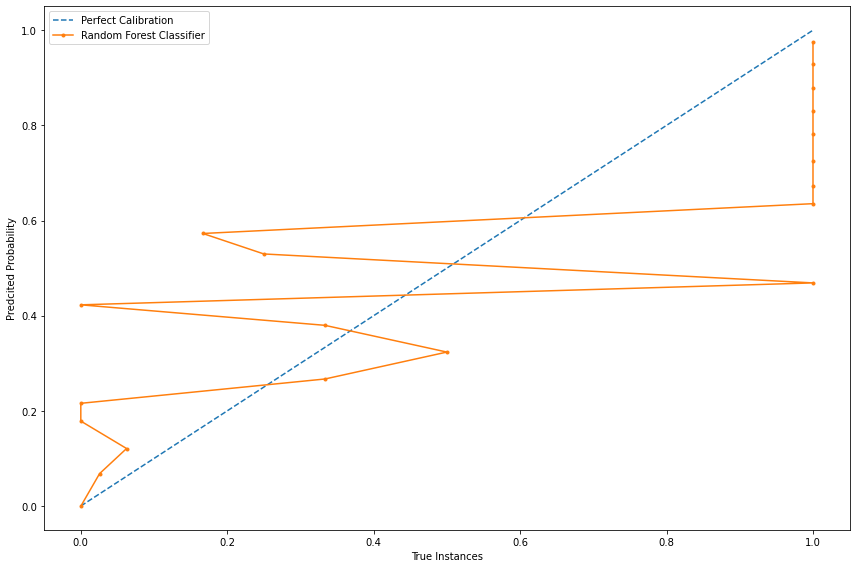

In [133]:
pyplot.figure(figsize=(12,8))
pyplot.plot([0,1],[0,1], linestyle='--', label="Perfect Calibration")
pyplot.plot(prob_true,prob_predicted,marker='.',label='Random Forest Classifier')
pyplot.xlabel('True Instances')
pyplot.ylabel('Predcited Probability')
pyplot.tight_layout()
pyplot.legend()
pyplot.show()